# Lineare Algebra I - Vorlesung

**Themenüberblick:**

- Vektorrechnung: Linearkombination, linear (un)abhängig, Dimension, (Unter-)Vektorraum
- Vektoren und Matrizen als Datenformat für Zielfunktion und Nebenbedingungen: Gleichungen zu Ungleichungen, Max zu Min
- lineare Funktionen: inneres Produkt, Transponieren, Gradient, Transformation vom Inputraum in den Outputraum, Konturlinien
- lineare Ungleichungssysteme: Geometrie, Formulierung als lineare Funktion(en)

**zusätzliche Unterlagen:** 

- `2_Vektorraeume-scan.pdf`
- `3_Lineare_Funktionen-scan.pdf`

In [1]:
%pylab inline
%config InlineBackend.figure_format = 'svg'

Populating the interactive namespace from numpy and matplotlib


## Vektorrechnung

**Notation(en) und erste Begriffe:**

Ein **Vektor** mit $n$ **Komponenten** (auch Elemente oder Koordinaten genannt), ein sogenannter $n$-Vektor, wird typischer Weise als **Spaltenvektor** 

$$\begin{pmatrix} x_1 \\ x_2 \\ \vdots \\ x_n \end{pmatrix}$$

oder **Zeilenvektor**

$$(x_1, x_2, \ldots , x_n)$$

geschrieben. 

**Transponieren**, geschrieben mit einem hochgestellten $T$, macht einen Spaltenvektor zum Zeilenvektor und umgekehrt:

$$\begin{align}
\begin{pmatrix} x_1 \\ x_2 \\ \vdots \\ x_n \end{pmatrix}^T & = (x_1, x_2, \ldots , x_n), \\
(x_1, x_2, \ldots , x_n)^T & = \begin{pmatrix} x_1 \\ x_2 \\ \vdots \\ x_n \end{pmatrix}.
\end{align}$$

Gibt man einem Vektor z. B. den Namen $x$, so heißt $x^T$ der transponierte Vektor, und es gilt offenbar $(x^T)^T = x$.
Die Unterscheidung in Spalten- und Zeilenvektoren ist erst in der Matrizenrechnung relevant und man könnte in der reinen Vektorrechnung einen $n$-Vektor einfach(er) als eine geordnete Liste von $n$ Zahlen definieren. Wir werden aber die Vorzüge der Matrixmultiplikation und des Transponierens von Beginn an verwenden und Vektoren als Spalten- oder Zeilenvektoren  schreiben. Diese identifizieren wir für die Matrizenrechnung mit $n\times 1$ bzw. $1\times n$ Matrizen.

Der **Vektorraum $\mathbb{R}^n$** ist die Menge aller $n$-Vektor mit reellen Komponenten. Er hat die **Dimension** $n$, da jeder Vektor aus $\mathbb{R}^n$ eindeutig durch $n$ Zahlen, z. B. seine $n$ Komponenten, bestimmt ist.

*Achtung:*

- Eine Liste von z. B. 300 10er-Vektoren wird üblicherweise mit $x_1, x_2, \ldots, x_{300}$ bezeichnet. Dabei ist $x_k\in\mathbb{R}^n$, d. h. $x_k= \begin{pmatrix} x_{k,1} \\ x_{k,2} \\ \vdots \\ x_{k,10} \end{pmatrix}.$
- In Python
    
    + entspricht das Ergebnis von `len(x)` dem obigen Dimensionsbegriff.
    + ergibt `ndim(x)` eins für Vektoren und zwei für Matrizen.

**Anwendungen und graphische Darstellungen von Vektoren:** 

Vektoren werden zur Modellierung von sehr vielen Objekten verwendet. Hier die bekanntesten: 

- Punkte: in der Ebene und im Raum, Ereignisse in der Raumzeit, etc.
- Pfeile: Ortsvektor, Verschiebung, Geschwindigkeit, Beschleunigung, Kraft, (Dreh-)Impuls etc.
- (technische) Signale und andere Zeitreihen wie z. B. cash flows
- Listen: Preisvektor, Einkaufskorb, Allokation etc.

**Die lineare Struktur eines Vektorraums:** 

Die folgenden zwei Rechenoperationen definieren auf einer Menge einen Vektorraum:

- **Skalarmultiplikation**: Die elementweise Multiplikation eines Skalars (einer Zahl) mit allen Vektorkomponenten liefert wieder einen Vektor.
- **Addition**: elementweise, liefert wieder einen Vektor

Es gelten die üblichen, intuitiven Rechenregeln. Die Interpretation von Skalarmultiplikation und Addition hängt davon ab, was die Vektoren modellieren.

Ein Ausdruck der Form $\alpha x + \beta y$ mit $\alpha, \beta \in \mathbb{R}$ und $x, y \in \mathbb{R}^n$ oder allgemeiner $\alpha_1 v_1 + \alpha_2 v_2 + \ldots + \alpha_k v_k$ mit $\alpha_i \in \mathbb{R}$ und $v_i \in \mathbb{R}^n$ heißt **Linearkombination** der vorkommenden zwei bzw. $k$ Vektoren. 

Eine Menge von $k$ Vektoren $v_1, v_2, \ldots, v_k$ heißt **linear unabhängig**, wenn die Gleichung $\alpha_1 v_1 + \alpha_2 v_2 + \ldots + \alpha_n v_n = 0$ nur die triviale Lösung $\alpha_i = 0$ hat. Andernfalls heißen die $k$ Vektoren **linear abhängig** und mindestens einer der vorkommenden Vektoren läßt sich als Linearkombination der restlichen ausdrücken.

Ein **Untervektorraum** ist eine Menge von Vektoren, sodass jede Linearkombination von Vektoren der Menge wieder in der Menge ist. 

Die **lineare Hülle** von $k$ Vektoren ist die Menge aller ihrer Linearkombinationen und bildet einen Untervektorraum. Falls die $k$ Vektoren linear unabhänging sind, dann ist jeder Vektor ihrer linearen Hülle eindeutig als Linearkombination der $k$ Vektoren dargestellt.

Die **Dimension**  eines (Unter-)Vektorraums ist seine maximale Anzahl linear unabhängiger Vektoren. Eine Gerade hat Dimension 1, eine Ebene Dimension 2 etc.

**Das innere Produkt:**

Eine weitere Rechenoperation stellt das **innere Produkt** (engl. *inner product* oder *dot product*) dar, das für zwei Spaltenvektoren $x =\begin{pmatrix} x_1 \\ x_2 \\ \vdots \\ x_n \end{pmatrix}$ und $y =\begin{pmatrix} y_1 \\ y_2 \\ \vdots \\ y_n \end{pmatrix}$ durch Multiplizieren entsprechender Komponenten und anschließendes Aufsummieren eine Zahl liefert. Unter Verwendung der Matrizenmultiplikation schreiben wir das innere Produkt von $x$ mit $y$ als

$$x^Ty = (x_1, x_2, \ldots , x_n)\begin{pmatrix} y_1 \\ y_2 \\ \vdots \\ y_n \end{pmatrix} = x_1 y_1 + x_2 y_2 + \ldots x_n y_n.$$

Es gilt $x^T y = y^T x$.
Werden die Vektoren $x$ und $y$ als Pfeile interpretiert, so gilt, dass ihr inneres Produkt dem Produkt folgender Faktoren entspricht:

- Länge der orthogonalen Projektion von $x$ auf $y$,
- Länge von $y$ und 
- -1, falls zwischen $x$ auf $y$ ein stumpfer Winkel ist.

Dabei ist die **Länge** $\lVert x\rVert$ eines Vektors $x$ über den verallgemeinerten Satz von Pythagoras als $\lVert x\rVert = \sqrt{x_1^2 + x_2^2 + \ldots + x_n^2}$ definiert und kann mit Hilfe des inneren Produktes als $\lVert x\rVert = \sqrt{x^T x}$ geschrieben werden.
Wenn wir den **Winkel** zwischen zwei Vektoren $x$ auf $y$ mit $\varphi$ bezeichnen, so gilt: 

$$x^T y = \lVert x\rVert \lVert y\rVert \cos(\varphi).$$

**Anwendungsbeispiel: Dekodierung mit dem inneren Produkt**

Ein Eingangssignal mit $n$ Samples wird über einen verrauschten Kommunikationskanal gesendet. Durch die Übertragung wird das Eingangssignal um einen unbekannten positiven Faktor $\alpha$ gedämpft und mit Rauschen überlagert. 
Wir modellieren das Eingangssignal als $n$-Vektor $u$, das Ausgangssignal als $n$-Vektor $v$ und das Rauschsignal als $n$-Vektor $w$. Die Komponenten $u_k$, $v_k$, $w_k$ sind die Werte der Signale zum Zeitpunkt $k = 1, ..., n$. Die Beziehung zwischen $u$ und $v$ ist gegeben durch 

$$v = \alpha u + w.$$

Nehmen wir nun an, wir wissen, dass das Eingangssignal $u$ aus einer Menge von vier möglichen Eingangssignale $a$, $b$, $c$, $d$ gewählt wurde. Wir kennen diese Signale, aber wir wissen nicht, welches als Eingangssignal $u$ verwendet wurde. Unsere Aufgabe ist es nun, einen einfachen, automatisierten Weg zu finden, um das Eingangssignal auf der Grundlage des empfangenen Signals $v$ zu schätzen. Es gibt viele Möglichkeiten, dies zu tun. Eine Möglichkeit besteht darin, die Winkel zwischen $v$ und allen möglichen Eingangssignale zu berechnen und jenes Signal zu wählen, das den kleinsten Winkel mit $v$ hat.

Laden Sie die Datei `Decoding_Using_Inner_Products.csv`, das alle Signale als Spalten in folgender Reihenfolge enthält $a$, $b$, $c$, $d$, $v$. Laden Sie sie mit den Befehlen

```python
X = genfromtxt("Decoding_Using_Inner_Products.csv")
a = X[:,0]
b = X[:,1]
c = X[:,2]
d = X[:,3]
v = X[:,4]
```

1. Warum ist das Signal mit dem kleinsten Winkel mit $v$ die beste Wahl?

2. Plotten Sie die Vektoren $v$, $a$, $b$, $c$ und $d$. Welches Eingangssignal wurde Ihrer Meinung nach verwendet? Begründen Sie Ihre Antwort aufgrund des Plots.

3. Berechnen Sie die Winkel zwischen $v$ und jedem der vier Signale unter Verwendung der Python-Befehle `arccos` und `norm`. Welches Eingangssignal wurde über den verrauschten Kommunikationskanal gesendet? Bestätigt sich Ihre vorige Antwort?

In [2]:
X = genfromtxt("daten/Decoding_Using_Inner_Products.csv")
a = X[:,0]
b = X[:,1]
c = X[:,2]
d = X[:,3]
v = X[:,4]

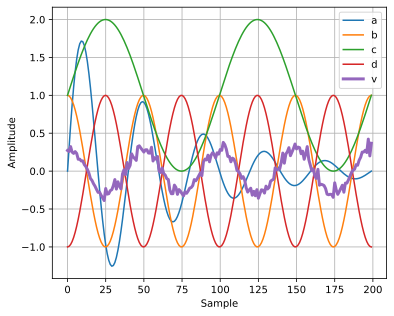

In [3]:
figure(figsize=(6,5))
plot(a, label='a')
plot(b, label='b')
plot(c, label='c')
plot(d, label='d')
plot(v, label='v', linewidth=3)
xlabel('Sample')
ylabel('Amplitude')
legend()
grid(True)

1. Da durch $v = \alpha u + w$ die Richtung des Outputsignals im Vergleich zum Inputsignal nur wenig (nämlich durch das Rauschsignal) verändert wird.
2. Im Plot erkennt man, dass das Signal $v$ in etwa das um den Faktor 0,5 skalierte Signal $b$ ist. Wenn man die anderen Signale einen positiven Faktor skaliert, kann man das Outputsignal $v$ nicht rekonstruieren.
3. Die Winkelberechnung unten bestätigt die Antwort aus dem Plot.

In [4]:
angle = arccos(dot(a,v)/norm(a)/norm(v))
print("Winkel zwischen a und v: {:.4f} rad".format(angle))

angle = arccos(dot(b,v)/norm(b)/norm(v))
print("Winkel zwischen b und v: {:.4f} rad".format(angle))

angle = arccos(dot(c,v)/norm(c)/norm(v))
print("Winkel zwischen c und v: {:.4f} rad".format(angle))

angle = arccos(dot(d,v)/norm(d)/norm(v))
print("Winkel zwischen d und v: {:.4f} rad".format(angle))

Winkel zwischen a und v: 1.2196 rad
Winkel zwischen b und v: 0.2221 rad
Winkel zwischen c und v: 1.5814 rad
Winkel zwischen d und v: 2.9195 rad


## Vektor-/Matrixformulierung von LPs

Ein lineares Programm (LP) besteht aus 

- einer linearen Zielfunktion, die maximiert oder minimiert wird und
- linearen Nebenbedingungen, d. h. linearen Ungleichungen und linearen Gleichungen.

Durch Multiplikation der Zielfunktion mit -1 wird eine Maximierung zu einer Minimierung.
Eine $\geq$-Ungleichung wird durch Multiplikation mit -1 zu einer $\leq$-Ungleichung. Daher kann ein LP immer in folgender Form geschrieben werden:

$$\begin{align}
\text{min.}\; 
c_1 x_1 + c_2 x_2 + \ldots + c_n x_n &  \\
\text{s.t.}\;  
A_{11} x_1 + A_{12} x_2 + \ldots + A_{1n} x_n & \leq b_1    \\
\vdots                                        & \leq \vdots \\
A_{m1} x_1 + A_{m2} x_2 + \ldots + A_{mn} x_n & \leq b_m    \\
G_{11} x_1 + G_{12} x_2 + \ldots + G_{1n} x_n & = h_1    \\
\vdots                                        & = \vdots \\
G_{p1} x_1 + G_{p2} x_2 + \ldots + G_{pn} x_n & = h_p    
\end{align}$$

Mit entsprechenden Vektoren und Matrizen läßt sich das LP komfortabler als

$$\begin{align}
\text{min.}\; 
c^T x &    \\
\text{s.t.}\;  
  A x & \leq b \\
  G x  & =   h 
\end{align}$$

schreiben. Die Vektoren $c, b$ und $h$ und die Matrizen $A$ und $B$ enthalten die vollständige Information des LP und dienen daher als Schnittstellenformat zu Solvern.

## Lineare Funktionen

**Definierende Eigenschaften:**

Eine lineare Funktion von $\mathbb{R}^n$ nach $\mathbb{R}$ ist gegeben durch das innere Produkt eines fixen Vektors $c$ mit einem variablen Vektor $x$: 

$$f(x) = c^T x = c_1 x_1 + c_2 x_2 + \ldots + c_n x_n.$$

Jede lineare Funktion erfüllt die Linearitätseigenschaft

$$f(\alpha x + \beta y) = \alpha f(x) + \beta f(y),$$

und jede Funktion, die die Linearitätseigenschaft erfüllt, ist von der Form $f(x) = c^Tx$.

**Geometrische Darstellung:**

- Die Konturlinien einer linearen Funktion in der Ebene sind parallele Geraden, und die Null-Konturlinie geht durch den Ursprung.
- Die Konturflächen einer linearen Funktion im Raum sind parallele Ebenen, und die Null-Konturfläche geht durch den Ursprung.

Der Koeffizientenvektor $c$ der linearen Funktion $f(x) = c^Tx$ ist orthogonal (=rechtwinklig) zu den Konturlinien bzw. Konturflächen.


**Beispiel: Konturplot**

Konturplot der linearen Funktion 

$$f:\mathbb{R}^2 \rightarrow \mathbb{R}: f(x) = -2x_1 + 3x_2.$$

Der Koeffizientenvektor ist $c = \begin{pmatrix} -2 \\ 3 \end{pmatrix}$, d. h. $f(x) = c^T x$.  

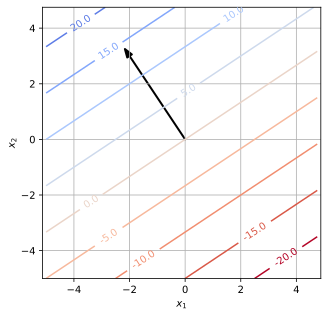

In [5]:
delta = 0.25
x1 = arange(-5.0, 5.0, delta)
x2 = arange(-5.0, 5.0, delta)
X1, X2 = meshgrid(x1, x2)

c = array([-2, 3])
Y = c[0]*X1 + c[1]*X2

figure(figsize=(5,5))
axis('equal')
arrow(0, 0, c[0], c[1], head_width=0.2, fc='k', linewidth=2)
CS = contour(X1, X2, Y, levels= arange(-20, 30, 5), cmap='coolwarm_r')
clabel(CS, inline=1, fmt='%1.1f')
xlabel('$x_1$')
ylabel('$x_2$')
grid(True)

## Lineare (Un-)Gleichungen

Eine **lineare Gleichung**

$$c_1 x_1 + c_2 x_2 + \ldots + c_n x_n = b$$

entspricht der Konturlinie/ebene/etc., allg. **Hyperebene**, $c^T x = b$ der linearen Funktion $f(x) = c^T x.$ 

Eine **lineare Ungleichung** 

$$c_1 x_1 + c_2 x_2 + \ldots + c_n x_n \leq b$$ 

definiert in $\mathbb{R}^n$ einen **Halbraum** und kann mittels der linearen Funktion $f(x) = c^T x$ als $c^T x \leq b$ geschrieben werden.